# Brainstation Capstone Project

Author: Reynaldo Cortez

Date: 2021-11-28

Contact: rejocortez@gmail.com


Description: Code below is an analysis on which statistical characteristics are predictive of an NBA's team success and then using this information to determine which players possess these attributes. The goal is to find which players can help a team win more games, even finding under appreciated players. 

Data: 

Datasets were adquired through Kaggle and GitHub.

- Game Data: 
<a href="https://www.kaggle.com/nathanlauga/nba-games">NBA Games</a>

- Salary Information: 
<a href="https://raw.githubusercontent.com/erikgregorywebb/datasets/master/nba-salaries.csv">NBA Salaries</a>

In [122]:
#This cell calls all the libraries that are used in this Notebook

# Basic packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import math
import operator

pd.options.display.float_format = "{:,.2f}".format

# To split the data as necessary for modelling
from sklearn.model_selection import train_test_split

# To build models
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

# To get rid of logistic regression default solver warnings that appear if sklearn hasn't been updated
import warnings
warnings.filterwarnings('ignore')

# To "pickle" things, like accuracies or even an entire fitted model
import joblib

# To try scale the data in various ways
from sklearn.preprocessing import StandardScaler

# To try dimensionality reduction
from sklearn.decomposition import PCA

# To check accuracy_scores and validate
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score

Examing the game dataset:

In [11]:
games_df = pd.read_csv('games.csv')
games_df.head()

,GAME_DATE_EST,GAME_ID,GAME_STATUS_TEXT,HOME_TEAM_ID,VISITOR_TEAM_ID,SEASON,TEAM_ID_home,PTS_home,FG_PCT_home,FT_PCT_home,...,AST_home,REB_home,TEAM_ID_away,PTS_away,FG_PCT_away,FT_PCT_away,FG3_PCT_away,AST_away,REB_away,HOME_TEAM_WINS
0,2021-05-26,42000102,Final,1610612755,1610612764,2020,1610612755,120.0,0.557,0.684,...,26.0,45.0,1610612764,95.0,0.402,0.633,0.091,22.0,40.0,1
1,2021-05-26,42000132,Final,1610612752,1610612737,2020,1610612752,101.0,0.383,0.739,...,15.0,54.0,1610612737,92.0,0.369,0.818,0.273,17.0,41.0,1
2,2021-05-26,42000142,Final,1610612762,1610612763,2020,1610612762,141.0,0.544,0.774,...,28.0,42.0,1610612763,129.0,0.541,0.763,0.348,20.0,33.0,1
3,2021-05-25,42000112,Final,1610612751,1610612738,2020,1610612751,130.0,0.523,0.955,...,31.0,46.0,1610612738,108.0,0.424,0.783,0.353,23.0,43.0,1
4,2021-05-25,42000152,Final,1610612756,1610612747,2020,1610612756,102.0,0.465,0.933,...,21.0,31.0,1610612747,109.0,0.450,0.871,0.303,24.0,39.0,0


In [12]:
games_df.shape

(24677, 21)

In [13]:
games_df.duplicated().sum()

15

In [14]:
print(list(games_df.columns))

['GAME_DATE_EST', 'GAME_ID', 'GAME_STATUS_TEXT', 'HOME_TEAM_ID', 'VISITOR_TEAM_ID', 'SEASON', 'TEAM_ID_home', 'PTS_home', 'FG_PCT_home', 'FT_PCT_home', 'FG3_PCT_home', 'AST_home', 'REB_home', 'TEAM_ID_away', 'PTS_away', 'FG_PCT_away', 'FT_PCT_away', 'FG3_PCT_away', 'AST_away', 'REB_away', 'HOME_TEAM_WINS']


In [15]:
duplicate_index = games_df.duplicated(keep = False) #finding all the duplicate rows
duplicates = games_df[duplicate_index].groupby(['GAME_ID', 'HOME_TEAM_ID']) #showing all duplicate data
duplicates.head()

,GAME_DATE_EST,GAME_ID,GAME_STATUS_TEXT,HOME_TEAM_ID,VISITOR_TEAM_ID,SEASON,TEAM_ID_home,PTS_home,FG_PCT_home,FT_PCT_home,...,AST_home,REB_home,TEAM_ID_away,PTS_away,FG_PCT_away,FT_PCT_away,FG3_PCT_away,AST_away,REB_away,HOME_TEAM_WINS
476,2021-01-01,22000069,Final,1610612766,1610612763,2020,1610612766,93.0,0.407,0.667,...,23.0,42.0,1610612763,108.0,0.478,0.800,0.359,34.0,48.0,0
481,2021-01-01,22000074,Final,1610612750,1610612764,2020,1610612750,109.0,0.477,0.571,...,17.0,43.0,1610612764,130.0,0.551,0.762,0.485,35.0,43.0,0
492,2020-12-31,22000068,Final,1610612762,1610612756,2020,1610612762,95.0,0.417,0.684,...,16.0,46.0,1610612756,106.0,0.488,0.700,0.515,26.0,41.0,0
495,2020-12-30,22000058,Final,1610612748,1610612749,2020,1610612748,119.0,0.488,0.828,...,25.0,52.0,1610612749,108.0,0.392,0.923,0.390,26.0,47.0,1
497,2020-12-30,22000060,Final,1610612759,1610612747,2020,1610612759,107.0,0.460,0.739,...,25.0,39.0,1610612747,121.0,0.561,0.750,0.538,25.0,47.0,0
498,2020-12-30,22000061,Final,1610612746,1610612757,2020,1610612746,128.0,0.495,0.727,...,30.0,47.0,1610612757,105.0,0.421,0.853,0.316,14.0,41.0,1
507,2020-12-29,22000054,Final,1610612746,1610612750,2020,1610612746,124.0,0.534,0.875,...,32.0,46.0,1610612750,101.0,0.416,0.824,0.342,22.0,39.0,1
509,2020-12-28,22000041,Final,1610612737,1610612765,2020,1610612737,128.0,0.488,0.875,...,30.0,45.0,1610612765,120.0,0.439,0.875,0.317,24.0,48.0,1
513,2020-12-28,22000045,Final,1610612747,1610612757,2020,1610612747,107.0,0.471,0.833,...,20.0,41.0,1610612757,115.0,0.467,0.867,0.348,27.0,45.0,0
516,2020-12-27,22000033,Final,1610612764,1610612753,2020,1610612764,113.0,0.485,0.846,...,27.0,47.0,1610612753,120.0,0.435,0.974,0.360,19.0,45.0,0


In [16]:
games_df.duplicated().sum()/games_df.shape[0]*100 

0.06078534667909389

The duplicated rows account for 0.06% of all the data, decision is made to drop these rows.

In [17]:
games_df.drop_duplicates(inplace=True)

In [18]:
games_df.isna().sum()

GAME_DATE_EST        0
GAME_ID              0
GAME_STATUS_TEXT     0
HOME_TEAM_ID         0
VISITOR_TEAM_ID      0
SEASON               0
TEAM_ID_home         0
PTS_home            99
FG_PCT_home         99
FT_PCT_home         99
FG3_PCT_home        99
AST_home            99
REB_home            99
TEAM_ID_away         0
PTS_away            99
FG_PCT_away         99
FT_PCT_away         99
FG3_PCT_away        99
AST_away            99
REB_away            99
HOME_TEAM_WINS       0
dtype: int64

In [19]:
nulls = games_df[games_df.isna().any(axis=1)].groupby(['GAME_ID']) #showing all null value rows
nulls.head()

,GAME_DATE_EST,GAME_ID,GAME_STATUS_TEXT,HOME_TEAM_ID,VISITOR_TEAM_ID,SEASON,TEAM_ID_home,PTS_home,FG_PCT_home,FT_PCT_home,...,AST_home,REB_home,TEAM_ID_away,PTS_away,FG_PCT_away,FT_PCT_away,FG3_PCT_away,AST_away,REB_away,HOME_TEAM_WINS
17201,2003-10-24,10300116,Final,1610612753,1610612762,2003,1610612753,NaN,NaN,NaN,...,NaN,NaN,1610612762,NaN,NaN,NaN,NaN,NaN,NaN,0
17202,2003-10-24,10300108,Final,1610612737,1610612764,2003,1610612737,NaN,NaN,NaN,...,NaN,NaN,1610612764,NaN,NaN,NaN,NaN,NaN,NaN,0
17203,2003-10-24,10300109,Final,1610612738,1610612751,2003,1610612738,NaN,NaN,NaN,...,NaN,NaN,1610612751,NaN,NaN,NaN,NaN,NaN,NaN,0
17204,2003-10-24,10300113,Final,1610612759,1610612745,2003,1610612759,NaN,NaN,NaN,...,NaN,NaN,1610612745,NaN,NaN,NaN,NaN,NaN,NaN,0
17205,2003-10-24,10300112,Final,1610612749,1610612765,2003,1610612749,NaN,NaN,NaN,...,NaN,NaN,1610612765,NaN,NaN,NaN,NaN,NaN,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17295,2003-10-09,10300019,Final,1610612743,1610612756,2003,1610612743,NaN,NaN,NaN,...,NaN,NaN,1610612756,NaN,NaN,NaN,NaN,NaN,NaN,0
17296,2003-10-09,10300022,Final,1610612757,1610612758,2003,1610612757,NaN,NaN,NaN,...,NaN,NaN,1610612758,NaN,NaN,NaN,NaN,NaN,NaN,0
17297,2003-10-08,10300013,Final,1610612759,1610612763,2003,1610612759,NaN,NaN,NaN,...,NaN,NaN,1610612763,NaN,NaN,NaN,NaN,NaN,NaN,0
17304,2003-10-08,10300015,Final,1610612747,1610612744,2003,1610612747,NaN,NaN,NaN,...,NaN,NaN,1610612744,NaN,NaN,NaN,NaN,NaN,NaN,0


In [20]:
nulls['GAME_DATE_EST'].unique()

GAME_ID
10300006    [2003-10-07]
10300013    [2003-10-08]
10300015    [2003-10-08]
10300019    [2003-10-09]
10300020    [2003-10-09]
                ...     
10300112    [2003-10-24]
10300113    [2003-10-24]
10300114    [2003-10-24]
10300115    [2003-10-24]
10300116    [2003-10-24]
Name: GAME_DATE_EST, Length: 99, dtype: object

In [21]:
games_df.isna().sum()/games_df.shape[0] * 100

GAME_DATE_EST       0.000000
GAME_ID             0.000000
GAME_STATUS_TEXT    0.000000
HOME_TEAM_ID        0.000000
VISITOR_TEAM_ID     0.000000
SEASON              0.000000
TEAM_ID_home        0.000000
PTS_home            0.401427
FG_PCT_home         0.401427
FT_PCT_home         0.401427
FG3_PCT_home        0.401427
AST_home            0.401427
REB_home            0.401427
TEAM_ID_away        0.000000
PTS_away            0.401427
FG_PCT_away         0.401427
FT_PCT_away         0.401427
FG3_PCT_away        0.401427
AST_away            0.401427
REB_away            0.401427
HOME_TEAM_WINS      0.000000
dtype: float64

The rows with null values account for 0.4% of all the data, decision is made to drop these rows.

In [22]:
games_df = games_df.dropna(how='any',axis=0) 

In [23]:
games_df.isna().sum()

GAME_DATE_EST       0
GAME_ID             0
GAME_STATUS_TEXT    0
HOME_TEAM_ID        0
VISITOR_TEAM_ID     0
SEASON              0
TEAM_ID_home        0
PTS_home            0
FG_PCT_home         0
FT_PCT_home         0
FG3_PCT_home        0
AST_home            0
REB_home            0
TEAM_ID_away        0
PTS_away            0
FG_PCT_away         0
FT_PCT_away         0
FG3_PCT_away        0
AST_away            0
REB_away            0
HOME_TEAM_WINS      0
dtype: int64

In [24]:
games_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 24563 entries, 0 to 24676
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   GAME_DATE_EST     24563 non-null  object 
 1   GAME_ID           24563 non-null  int64  
 2   GAME_STATUS_TEXT  24563 non-null  object 
 3   HOME_TEAM_ID      24563 non-null  int64  
 4   VISITOR_TEAM_ID   24563 non-null  int64  
 5   SEASON            24563 non-null  int64  
 6   TEAM_ID_home      24563 non-null  int64  
 7   PTS_home          24563 non-null  float64
 8   FG_PCT_home       24563 non-null  float64
 9   FT_PCT_home       24563 non-null  float64
 10  FG3_PCT_home      24563 non-null  float64
 11  AST_home          24563 non-null  float64
 12  REB_home          24563 non-null  float64
 13  TEAM_ID_away      24563 non-null  int64  
 14  PTS_away          24563 non-null  float64
 15  FG_PCT_away       24563 non-null  float64
 16  FT_PCT_away       24563 non-null  float6

In [25]:
games_details_df = pd.read_csv('games_details.csv')
games_details_df.head()

,GAME_ID,TEAM_ID,TEAM_ABBREVIATION,TEAM_CITY,PLAYER_ID,PLAYER_NAME,START_POSITION,COMMENT,MIN,FGM,...,OREB,DREB,REB,AST,STL,BLK,TO,PF,PTS,PLUS_MINUS
0,42000102,1610612764,WAS,Washington,203078,Bradley Beal,F,NaN,34:36,14.0,...,0.0,4.0,4.0,3.0,1.0,0.0,1.0,0.0,33.0,-22.0
1,42000102,1610612764,WAS,Washington,1629060,Rui Hachimura,F,NaN,25:50,4.0,...,2.0,5.0,7.0,1.0,0.0,0.0,3.0,4.0,11.0,-6.0
2,42000102,1610612764,WAS,Washington,203458,Alex Len,C,NaN,12:11,3.0,...,3.0,2.0,5.0,0.0,1.0,0.0,0.0,2.0,6.0,-11.0
3,42000102,1610612764,WAS,Washington,203526,Raul Neto,G,NaN,19:19,2.0,...,1.0,2.0,3.0,1.0,0.0,0.0,0.0,2.0,4.0,-17.0
4,42000102,1610612764,WAS,Washington,201566,Russell Westbrook,G,NaN,29:07,2.0,...,2.0,4.0,6.0,11.0,0.0,0.0,4.0,0.0,10.0,-16.0


In [26]:
games_details_df

,GAME_ID,TEAM_ID,TEAM_ABBREVIATION,TEAM_CITY,PLAYER_ID,PLAYER_NAME,START_POSITION,COMMENT,MIN,FGM,...,OREB,DREB,REB,AST,STL,BLK,TO,PF,PTS,PLUS_MINUS
0,42000102,1610612764,WAS,Washington,203078,Bradley Beal,F,NaN,34:36,14.0,...,0.0,4.0,4.0,3.0,1.0,0.0,1.0,0.0,33.0,-22.0
1,42000102,1610612764,WAS,Washington,1629060,Rui Hachimura,F,NaN,25:50,4.0,...,2.0,5.0,7.0,1.0,0.0,0.0,3.0,4.0,11.0,-6.0
2,42000102,1610612764,WAS,Washington,203458,Alex Len,C,NaN,12:11,3.0,...,3.0,2.0,5.0,0.0,1.0,0.0,0.0,2.0,6.0,-11.0
3,42000102,1610612764,WAS,Washington,203526,Raul Neto,G,NaN,19:19,2.0,...,1.0,2.0,3.0,1.0,0.0,0.0,0.0,2.0,4.0,-17.0
4,42000102,1610612764,WAS,Washington,201566,Russell Westbrook,G,NaN,29:07,2.0,...,2.0,4.0,6.0,11.0,0.0,0.0,4.0,0.0,10.0,-16.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
615621,11200005,1610612743,DEN,Denver,202706,Jordan Hamilton,NaN,NaN,19,4.0,...,0.0,2.0,2.0,0.0,2.0,0.0,1.0,3.0,17.0,NaN
615622,11200005,1610612743,DEN,Denver,202702,Kenneth Faried,NaN,NaN,23,7.0,...,1.0,0.0,1.0,1.0,1.0,0.0,3.0,3.0,18.0,NaN
615623,11200005,1610612743,DEN,Denver,201585,Kosta Koufos,NaN,NaN,15,3.0,...,3.0,5.0,8.0,0.0,1.0,0.0,0.0,3.0,6.0,NaN
615624,11200005,1610612743,DEN,Denver,202389,Timofey Mozgov,NaN,NaN,19,1.0,...,1.0,2.0,3.0,1.0,0.0,0.0,4.0,2.0,2.0,NaN


In [27]:
games_details_df.shape

(615626, 28)

In [28]:
print(list(games_details_df.columns))

['GAME_ID', 'TEAM_ID', 'TEAM_ABBREVIATION', 'TEAM_CITY', 'PLAYER_ID', 'PLAYER_NAME', 'START_POSITION', 'COMMENT', 'MIN', 'FGM', 'FGA', 'FG_PCT', 'FG3M', 'FG3A', 'FG3_PCT', 'FTM', 'FTA', 'FT_PCT', 'OREB', 'DREB', 'REB', 'AST', 'STL', 'BLK', 'TO', 'PF', 'PTS', 'PLUS_MINUS']


In [29]:
games_ex_df = games_details_df.drop(['TEAM_ABBREVIATION', 'TEAM_CITY', 'PLAYER_ID', 'START_POSITION', 'COMMENT', 'MIN', 'FGM', 'FGA', 'FG3M', 'FG3A', 'FTM', 'FTA', 'OREB', 'DREB', 'PF', 'PTS', 'PLUS_MINUS', 'PLAYER_NAME', 'FG_PCT',	'FG3_PCT','FT_PCT', 'REB', 'AST'], 1)

In [30]:
games_ex_df.head(5)

,GAME_ID,TEAM_ID,STL,BLK,TO
0,42000102,1610612764,1.0,0.0,1.0
1,42000102,1610612764,0.0,0.0,3.0
2,42000102,1610612764,1.0,0.0,0.0
3,42000102,1610612764,0.0,0.0,0.0
4,42000102,1610612764,0.0,0.0,4.0


In [31]:
games_ex_df2 = games_ex_df.groupby(["GAME_ID", "TEAM_ID"]).sum()

games_ex_df2.head(5)

STL  BLK    TO
GAME_ID  TEAM_ID                    
10300001 1610612742   9.0  4.0  18.0
         1610612762   8.0  4.0  18.0
10300002 1610612749   9.0  4.0  24.0
         1610612763  18.0  7.0  25.0
10300003 1610612739  10.0  7.0  25.0

In [32]:
games_ex_df2.index

MultiIndex([(10300001, 1610612742),
            (10300001, 1610612762),
            (10300002, 1610612749),
            (10300002, 1610612763),
            (10300003, 1610612739),
            (10300003, 1610612765),
            (10300004, 1610612742),
            (10300004, 1610612753),
            (10300005, 1610612745),
            (10300005, 1610612757),
            ...
            (52000111, 1610612754),
            (52000111, 1610612766),
            (52000121, 1610612744),
            (52000121, 1610612747),
            (52000131, 1610612759),
            (52000131, 1610612763),
            (52000201, 1610612754),
            (52000201, 1610612764),
            (52000211, 1610612744),
            (52000211, 1610612763)],
           names=['GAME_ID', 'TEAM_ID'], length=49047)

In [33]:
games_ex_df2.stack()

GAME_ID   TEAM_ID        
10300001  1610612742  STL     9.0
                      BLK     4.0
                      TO     18.0
          1610612762  STL     8.0
                      BLK     4.0
                             ... 
52000211  1610612744  BLK     7.0
                      TO     21.0
          1610612763  STL    14.0
                      BLK     6.0
                      TO     13.0
Length: 147141, dtype: float64

In [34]:
games_ex_df2.loc[10300001, 1610612742]

STL     9.0
BLK     4.0
TO     18.0
Name: (10300001, 1610612742), dtype: float64

In [35]:
games_ex_df2.unstack()

STL                                                         \
TEAM_ID  1610612737 1610612738 1610612739 1610612740 1610612741 1610612742   
GAME_ID                                                                      
10300001        NaN        NaN        NaN        NaN        NaN        9.0   
10300002        NaN        NaN        NaN        NaN        NaN        NaN   
10300003        NaN        NaN       10.0        NaN        NaN        NaN   
10300004        NaN        NaN        NaN        NaN        NaN        9.0   
10300005        NaN        NaN        NaN        NaN        NaN        NaN   
...             ...        ...        ...        ...        ...        ...   
52000111        NaN        NaN        NaN        NaN        NaN        NaN   
52000121        NaN        NaN        NaN        NaN        NaN        NaN   
52000131        NaN        NaN        NaN        NaN        NaN        NaN   
52000201        NaN        NaN        NaN        NaN        NaN        NaN   
52000211        NaN        NaN        NaN        NaN        NaN        NaN   

                                                      ...         TO  \
TEAM_ID  1610612743 1610612744 1610612745 1610612746  ... 1610612757   
GAME_ID                                               ...              
10300001        NaN        NaN        NaN        NaN  ...        NaN   
10300002        NaN        NaN        NaN        NaN  ...        NaN   
10300003        NaN        NaN        NaN        NaN  ...        NaN   
10300004        NaN        NaN        NaN        NaN  ...        NaN   
10300005        NaN        NaN        9.0        NaN  ...       15.0   
...             ...        ...        ...        ...  ...        ...   
52000111        NaN        NaN        NaN        NaN  ...        NaN   
52000121        NaN        8.0        NaN        NaN  ...        NaN   
52000131        NaN        NaN        NaN        NaN  ...        NaN   
52000201        NaN        NaN        NaN        NaN  ...        NaN   
52000211        NaN        7.0        NaN        NaN  ...        NaN   

                                                                            \
TEAM_ID  1610612758 1610612759 1610612760 1610612761 1610612762 1610612763   
GAME_ID                                                                      
10300001        NaN        NaN        NaN        NaN       18.0        NaN   
10300002        NaN        NaN        NaN        NaN        NaN       25.0   
10300003        NaN        NaN        NaN        NaN        NaN        NaN   
10300004        NaN        NaN        NaN        NaN        NaN        NaN   
10300005        NaN        NaN        NaN        NaN        NaN        NaN   
...             ...        ...        ...        ...        ...        ...   
52000111        NaN        NaN        NaN        NaN        NaN        NaN   
52000121        NaN        NaN        NaN        NaN        NaN        NaN   
52000131        NaN        8.0        NaN        NaN        NaN        9.0   
52000201        NaN        NaN        NaN        NaN        NaN        NaN   
52000211        NaN        NaN        NaN        NaN        NaN       13.0   

                                           
TEAM_ID  1610612764 1610612765 1610612766  
GAME_ID                                    
10300001        NaN        NaN        NaN  
10300002        NaN        NaN        NaN  
10300003        NaN       13.0        NaN  
10300004        NaN        NaN        NaN  
10300005        NaN        NaN        NaN  
...             ...        ...        ...  
52000111        NaN        NaN       14.0  
52000121        NaN        NaN        NaN  
52000131        NaN        NaN        NaN  
52000201       15.0        NaN        NaN  
52000211        NaN        NaN        NaN  

[24523 rows x 90 columns]

In [36]:
games_ex_df2.loc[(10300001, 1610612742), 'STL']

9.0

In [37]:
games_ex_df2.stack()

GAME_ID   TEAM_ID        
10300001  1610612742  STL     9.0
                      BLK     4.0
                      TO     18.0
          1610612762  STL     8.0
                      BLK     4.0
                             ... 
52000211  1610612744  BLK     7.0
                      TO     21.0
          1610612763  STL    14.0
                      BLK     6.0
                      TO     13.0
Length: 147141, dtype: float64

In [38]:
games_ex_df2.reset_index()

,GAME_ID,TEAM_ID,STL,BLK,TO
0,10300001,1610612742,9.0,4.0,18.0
1,10300001,1610612762,8.0,4.0,18.0
2,10300002,1610612749,9.0,4.0,24.0
3,10300002,1610612763,18.0,7.0,25.0
4,10300003,1610612739,10.0,7.0,25.0
...,...,...,...,...,...
49042,52000131,1610612763,4.0,11.0,9.0
49043,52000201,1610612754,9.0,4.0,14.0
49044,52000201,1610612764,7.0,9.0,15.0
49045,52000211,1610612744,7.0,7.0,21.0


In [39]:
games_ex_df2 = games_ex_df2.reset_index()

In [40]:
games_df.head(5)

,GAME_DATE_EST,GAME_ID,GAME_STATUS_TEXT,HOME_TEAM_ID,VISITOR_TEAM_ID,SEASON,TEAM_ID_home,PTS_home,FG_PCT_home,FT_PCT_home,...,AST_home,REB_home,TEAM_ID_away,PTS_away,FG_PCT_away,FT_PCT_away,FG3_PCT_away,AST_away,REB_away,HOME_TEAM_WINS
0,2021-05-26,42000102,Final,1610612755,1610612764,2020,1610612755,120.0,0.557,0.684,...,26.0,45.0,1610612764,95.0,0.402,0.633,0.091,22.0,40.0,1
1,2021-05-26,42000132,Final,1610612752,1610612737,2020,1610612752,101.0,0.383,0.739,...,15.0,54.0,1610612737,92.0,0.369,0.818,0.273,17.0,41.0,1
2,2021-05-26,42000142,Final,1610612762,1610612763,2020,1610612762,141.0,0.544,0.774,...,28.0,42.0,1610612763,129.0,0.541,0.763,0.348,20.0,33.0,1
3,2021-05-25,42000112,Final,1610612751,1610612738,2020,1610612751,130.0,0.523,0.955,...,31.0,46.0,1610612738,108.0,0.424,0.783,0.353,23.0,43.0,1
4,2021-05-25,42000152,Final,1610612756,1610612747,2020,1610612756,102.0,0.465,0.933,...,21.0,31.0,1610612747,109.0,0.450,0.871,0.303,24.0,39.0,0


In [41]:
games_df["STL_home"] = ""
games_df["STL_away"] = ""
games_df["BLK_home"] = ""
games_df["BLK_away"] = ""
games_df["TO_home"] = ""
games_df["TO_away"] = ""

In [42]:
print(list(games_df.columns))

['GAME_DATE_EST', 'GAME_ID', 'GAME_STATUS_TEXT', 'HOME_TEAM_ID', 'VISITOR_TEAM_ID', 'SEASON', 'TEAM_ID_home', 'PTS_home', 'FG_PCT_home', 'FT_PCT_home', 'FG3_PCT_home', 'AST_home', 'REB_home', 'TEAM_ID_away', 'PTS_away', 'FG_PCT_away', 'FT_PCT_away', 'FG3_PCT_away', 'AST_away', 'REB_away', 'HOME_TEAM_WINS', 'STL_home', 'STL_away', 'BLK_home', 'BLK_away', 'TO_home', 'TO_away']


In [43]:
#games_df is filled with a csv created before, since the for loop below takes time to load, I'm using the created CSV.

games_df = pd.read_csv('games_ext.csv')

#Code below was to write Steals, Blocks and Turnovers to the game data.
#Becase this code takes 

# for i in range(0, len(games_df)):
    
#     for j in range (0, len(games_ex_df2)):
        
#         if games_df['GAME_ID'].iloc[i] == games_ex_df2['GAME_ID'].iloc[j]:
            
#             if games_df['HOME_TEAM_ID'].iloc[i] == games_ex_df2['TEAM_ID'].iloc[j]:

#                 games_df.iloc[i, games_df.columns.get_loc('STL_home')] = games_ex_df2['STL'].iloc[j]
#                 games_df.iloc[i, games_df.columns.get_loc('BLK_home')] = games_ex_df2['BLK'].iloc[j]
#                 games_df.iloc[i, games_df.columns.get_loc('TO_home')] = games_ex_df2['TO'].iloc[j]
            
#             if games_df['VISITOR_TEAM_ID'].iloc[i] == games_ex_df2['TEAM_ID'].iloc[j]:

#                 games_df.iloc[i, games_df.columns.get_loc('STL_away')] = games_ex_df2['STL'].iloc[j]
#                 games_df.iloc[i, games_df.columns.get_loc('BLK_away')] = games_ex_df2['BLK'].iloc[j]
#                 games_df.iloc[i, games_df.columns.get_loc('TO_away')] = games_ex_df2['TO'].iloc[j]

# games_df.to_csv('games_ext.csv')

In [44]:
games_df.isna().sum()

Unnamed: 0          0
GAME_DATE_EST       0
GAME_ID             0
GAME_STATUS_TEXT    0
HOME_TEAM_ID        0
VISITOR_TEAM_ID     0
SEASON              0
TEAM_ID_home        0
PTS_home            0
FG_PCT_home         0
FT_PCT_home         0
FG3_PCT_home        0
AST_home            0
REB_home            0
TEAM_ID_away        0
PTS_away            0
FG_PCT_away         0
FT_PCT_away         0
FG3_PCT_away        0
AST_away            0
REB_away            0
HOME_TEAM_WINS      0
STL_home            0
STL_away            0
BLK_home            0
BLK_away            0
TO_home             0
TO_away             0
dtype: int64

In [45]:
games_df.head(5)

,Unnamed: 0,GAME_DATE_EST,GAME_ID,GAME_STATUS_TEXT,HOME_TEAM_ID,VISITOR_TEAM_ID,SEASON,TEAM_ID_home,PTS_home,FG_PCT_home,...,FG3_PCT_away,AST_away,REB_away,HOME_TEAM_WINS,STL_home,STL_away,BLK_home,BLK_away,TO_home,TO_away
0,0,2021-05-26,42000102,Final,1610612755,1610612764,2020,1610612755,120.0,0.557,...,0.091,22.0,40.0,1,10.0,3.0,14.0,2.0,11.0,13.0
1,1,2021-05-26,42000132,Final,1610612752,1610612737,2020,1610612752,101.0,0.383,...,0.273,17.0,41.0,1,8.0,5.0,2.0,12.0,10.0,13.0
2,2,2021-05-26,42000142,Final,1610612762,1610612763,2020,1610612762,141.0,0.544,...,0.348,20.0,33.0,1,2.0,6.0,4.0,4.0,12.0,11.0
3,3,2021-05-25,42000112,Final,1610612751,1610612738,2020,1610612751,130.0,0.523,...,0.353,23.0,43.0,1,7.0,10.0,7.0,4.0,14.0,15.0
4,4,2021-05-25,42000152,Final,1610612756,1610612747,2020,1610612756,102.0,0.465,...,0.303,24.0,39.0,0,4.0,9.0,3.0,6.0,13.0,7.0


In [46]:
games_df['GAME_DATE_EST'] = pd.to_datetime(games_df['GAME_DATE_EST'])

In [47]:
X = games_df[['FG_PCT_home', 'FT_PCT_home', 
                'FG3_PCT_home', 'AST_home', 'REB_home', 
                'FG_PCT_away', 'FT_PCT_away', 
                'FG3_PCT_away', 'AST_away', 'REB_away',
                'STL_home', 'STL_away', 'BLK_home', 
                'BLK_away', 'TO_home', 'TO_away']]

y = games_df[['HOME_TEAM_WINS']]

In [48]:
X.head()

,FG_PCT_home,FT_PCT_home,FG3_PCT_home,AST_home,REB_home,FG_PCT_away,FT_PCT_away,FG3_PCT_away,AST_away,REB_away,STL_home,STL_away,BLK_home,BLK_away,TO_home,TO_away
0,0.557,0.684,0.429,26.0,45.0,0.402,0.633,0.091,22.0,40.0,10.0,3.0,14.0,2.0,11.0,13.0
1,0.383,0.739,0.364,15.0,54.0,0.369,0.818,0.273,17.0,41.0,8.0,5.0,2.0,12.0,10.0,13.0
2,0.544,0.774,0.487,28.0,42.0,0.541,0.763,0.348,20.0,33.0,2.0,6.0,4.0,4.0,12.0,11.0
3,0.523,0.955,0.447,31.0,46.0,0.424,0.783,0.353,23.0,43.0,7.0,10.0,7.0,4.0,14.0,15.0
4,0.465,0.933,0.308,21.0,31.0,0.450,0.871,0.303,24.0,39.0,4.0,9.0,3.0,6.0,13.0,7.0


In [49]:
y.head()

,HOME_TEAM_WINS
0,1
1,1
2,1
3,1
4,0


In [50]:
fig = px.histogram(y, x="HOME_TEAM_WINS")
fig.show()

In [51]:
# Split the data into remainder and test sets
X_rem, X_test, y_rem, y_test = train_test_split(X, y, test_size=0.3, random_state=1, stratify=y)

# Print info on how the data has been split
print(f'The remainder set has {len(X_rem)} data points.')
print(f'The test set has {len(X_test)} data points.')

The remainder set has 17194 data points.
The test set has 7369 data points.


In [52]:
baseline_logreg = LogisticRegression(random_state=1).fit(X_rem, y_rem)

# Print the accuracies
print(f'Accuracy on remainder set: {baseline_logreg.score(X_rem, y_rem)}')
print(f'Accuracy on test set: {baseline_logreg.score(X_test, y_test)}')

Accuracy on remainder set: 0.9051413283703618
Accuracy on test set: 0.9073144252951554


In [53]:
# Split the remainder set into train and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_rem, y_rem, train_size = 0.1, test_size=0.01, random_state=1, stratify=y_rem)

# Print info on how the data has been split
print(f'The train set has {len(X_train)} data points.')
print(f'The validation set has {len(X_val)} data points.')

The train set has 1719 data points.
The validation set has 172 data points.


In [54]:
print('Proportions in original data:')
print(y.value_counts()/len(y), '\n')

print('Proportions in remainder set:')
print(y_rem.value_counts()/len(y_rem), '\n')

print('Proportions in test set:')
print(y_test.value_counts()/len(y_test), '\n')

print('Proportions in train set:')
print(y_train.value_counts()/len(y_train), '\n')

print('Proportions in validation set:')
print(y_val.value_counts()/len(y_val), '\n')

Proportions in original data:
HOME_TEAM_WINS
1                 0.591459
0                 0.408541
dtype: float64 

Proportions in remainder set:
HOME_TEAM_WINS
1                 0.591485
0                 0.408515
dtype: float64 

Proportions in test set:
HOME_TEAM_WINS
1                 0.591396
0                 0.408604
dtype: float64 

Proportions in train set:
HOME_TEAM_WINS
1                 0.591623
0                 0.408377
dtype: float64 

Proportions in validation set:
HOME_TEAM_WINS
1                 0.593023
0                 0.406977
dtype: float64 



In [55]:
# Let's try a modest range of C values
c_values = [.00001, .0001, .001, .1, 1, 10, 100, 1000, 10000]

# Set up empty lists
train_accuracies = []
validation_accuracies = []

# Iterate over the C values
for value in c_values:
    
    # Instantiate a log reg and fit to the train set
    logreg = LogisticRegression(C=value, random_state=1).fit(X_train, y_train)
    
    # Score on the train set and append this accuracy to its respective list
    train_accuracies.append(logreg.score(X_train, y_train))
    
    # Score on the validation set and append this accuracy to its respective list
    validation_accuracies.append(logreg.score(X_val, y_val))

In [56]:
pd.DataFrame({'C value': c_values, 'train accuracy': train_accuracies, 'validation accuracy': validation_accuracies, 'Train minus Val': map(operator.sub, train_accuracies, validation_accuracies)})

,C value,train accuracy,validation accuracy,Train minus Val
0,0.00001,0.597440,0.610465,-0.013025
1,0.00010,0.775451,0.761628,0.013823
2,0.00100,0.795812,0.796512,-0.000700
3,0.10000,0.816754,0.825581,-0.008827
4,1.00000,0.858639,0.866279,-0.007640
5,10.00000,0.862711,0.866279,-0.003568
6,100.00000,0.870273,0.866279,0.003994
7,1000.00000,0.864456,0.877907,-0.013451
8,10000.00000,0.858639,0.883721,-0.025082


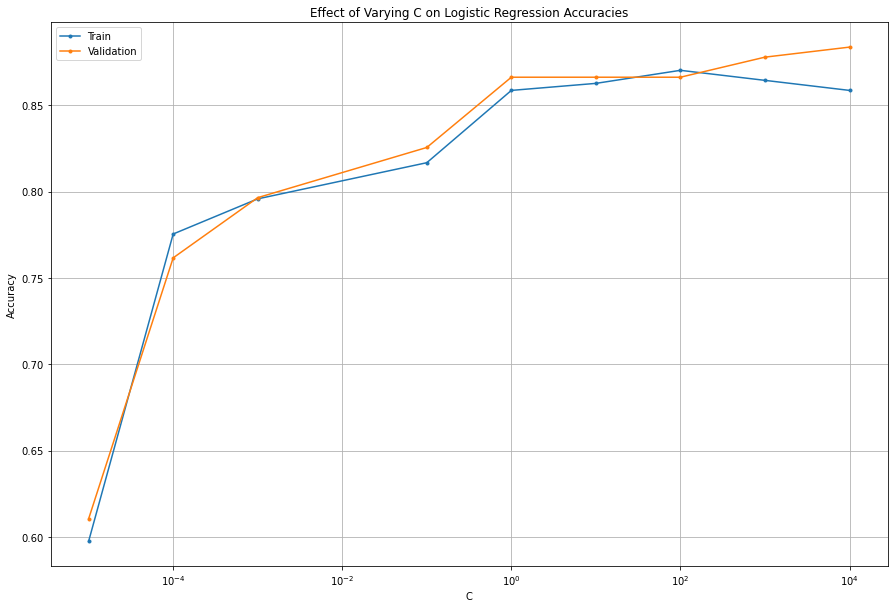

In [57]:
# Plot the accuracies
plt.figure(figsize=(15, 10))
plt.plot(c_values, train_accuracies, label='Train', marker='.')
plt.plot(c_values, validation_accuracies, label='Validation', marker='.')
plt.legend()
plt.title('Effect of Varying C on Logistic Regression Accuracies')
plt.xscale('log') # Put the x-axis on a log scale; this is important because the C values vary in orders of magnitude
plt.xlabel('C')
plt.ylabel('Accuracy')
plt.grid()
plt.show()

In [58]:
validated_logreg = LogisticRegression(C=10**2, random_state=1).fit(X_rem, y_rem)

# Print the accuracies
print(f'Accuracy on remainder set: {validated_logreg.score(X_rem, y_rem)}')
print(f'Accuracy on test set: {validated_logreg.score(X_test, y_test)}')

Accuracy on remainder set: 0.9088635570547866
Accuracy on test set: 0.9117926448636179


In [59]:
log_odds = validated_logreg.coef_[0]

Coefs = pd.DataFrame(log_odds, X_rem.columns, columns=['coef']).sort_values(by='coef', ascending=False)

Coefs

,coef
FG_PCT_home,44.727806
FG3_PCT_home,10.253734
FT_PCT_home,8.159216
TO_away,0.582178
REB_home,0.284672
BLK_home,0.079810
AST_home,0.039366
STL_home,0.034119
AST_away,-0.049948
STL_away,-0.135191


In [60]:
# Instantiate the model & fit it to our data
KNN_model = KNeighborsClassifier(n_neighbors=5)
KNN_model.fit(X_rem, y_rem)

train_predictions = KNN_model.predict(X_rem) # knn will compare each test point with all the training data points
train_accuracy = accuracy_score(train_predictions, y_rem)

print(f"Train set accuracy: {train_accuracy}")
print(f"Test set accuracy: {KNN_model.score(X_test, y_test)}")

Train set accuracy: 0.8357566592997557
Test set accuracy: 0.7474555570633736


In [61]:
#create a range depending on the number of rows in our train dataset

neighbors = range(1, X_train.shape[0], 2)  

#creating list to append score values

train_acc = []
test_acc = []

for n in neighbors: 
        
    #Instantiate the model & fit it to our data
    KNN_model = KNeighborsClassifier(n_neighbors=n)
    KNN_model.fit(X_train, y_train)
    
    #Find the model's prediction of X_train and X_val
    train_predictions = KNN_model.predict(X_train)
    test_predictions = KNN_model.predict(X_val)
    
    #Find the accuracies of train and val set
    train_accuracy = accuracy_score(train_predictions, y_train)
    test_accuracy = accuracy_score(test_predictions, y_val)
    
    #append accuracies to empty lists
    train_acc.append(train_accuracy)
    test_acc.append(test_accuracy)

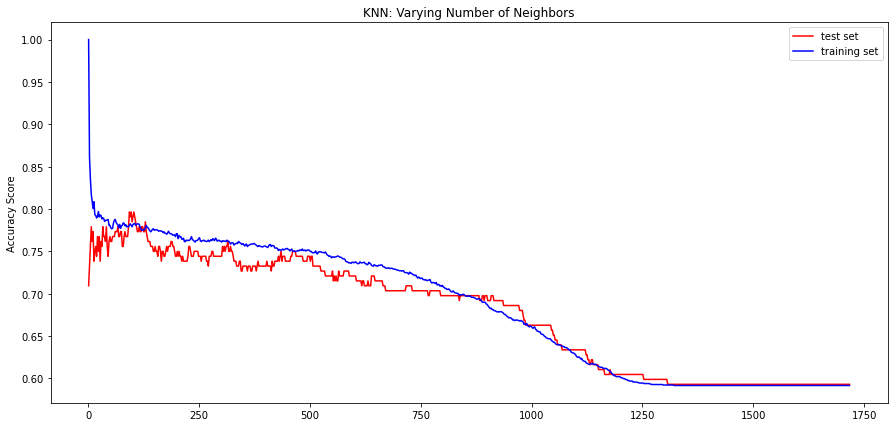

In [62]:
#changing figure size for better viewing

plt.figure(figsize=(15, 7))
plt.plot(neighbors, test_acc, color="red", label="test set") #test accuracy in red line
plt.plot(neighbors, train_acc, color="blue", label="training set") #train accuracy in blue line
plt.ylabel("Accuracy Score")
plt.title('KNN: Varying Number of Neighbors')
plt.legend()
plt.show()

In [63]:
#index the value that is largest in the test accuracy
index_of_max = np.argmax(test_acc)

#the corresponding best k value
best_k = neighbors[index_of_max]

best_k

93

In [64]:
KNN_model = KNeighborsClassifier(n_neighbors=93).fit(X_rem, y_rem)

print(f"Train set accuracy: {KNN_model.score(X_rem, y_rem)}")
print(f"Test set accuracy: {KNN_model.score(X_test, y_test)}")

Train set accuracy: 0.7881819239269513
Test set accuracy: 0.7823313882480663


In [65]:
DT_model = DecisionTreeClassifier()
DT_model.fit(X_rem, y_rem)
print(f'The train set has an accuracy of: {DT_model.score(X_rem, y_rem)}')
print(f'The validation set has an accuracy of: {DT_model.score(X_test, y_test)}')

The train set has an accuracy of: 1.0
The validation set has an accuracy of: 0.7995657484054824


In [66]:
#create empty list to store different accuracies

train_accs = []
test_accs = []
depth_values = list(range(1,15))

# Loop over different max_depths
for d in depth_values:
    
    # Instantiate & fit
    my_dt = DecisionTreeClassifier(max_depth = d)
    my_dt.fit(X_train, y_train)
    
    # Evaluate on train & test data
    train_accs.append( my_dt.score(X_train, y_train) )
    test_accs.append( my_dt.score(X_val, y_val) )

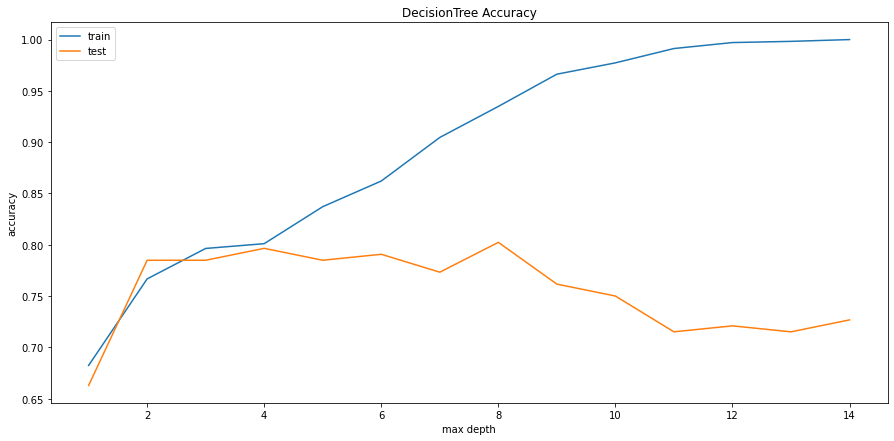

In [67]:
plt.figure(figsize=(15, 7))
plt.plot(depth_values, train_accs, label='train') #train accuracy in blue
plt.plot(depth_values, test_accs, label='test') #test accuracy in orange
plt.legend()
plt.xlabel('max depth')
plt.ylabel('accuracy')
plt.title('DecisionTree Accuracy')
plt.show()

In [68]:
DT_model = DecisionTreeClassifier(max_depth = 4).fit(X_rem, y_rem)

print(f'The train set has an accuracy of: {DT_model.score(X_rem, y_rem)}')
print(f'The validation set has an accuracy of: {DT_model.score(X_test, y_test)}')

The train set has an accuracy of: 0.7928347097824823
The validation set has an accuracy of: 0.7869453114398155


In [69]:
gd_df = games_details_df.drop(['TEAM_ID', 'TEAM_ABBREVIATION', 'TEAM_CITY', 'PLAYER_ID', 'START_POSITION', 'COMMENT', 'MIN', 'FGM', 'FGA', 'FG3M', 'FG3A', 'FTM', 'FTA', 'OREB', 'DREB', 'PF', 'PTS', 'PLUS_MINUS'], 1)

In [70]:
gd_df = gd_df.dropna(how='any',axis=0)
gd_df.head()

,GAME_ID,PLAYER_NAME,FG_PCT,FG3_PCT,FT_PCT,REB,AST,STL,BLK,TO
0,42000102,Bradley Beal,0.500,0.167,0.667,4.0,3.0,1.0,0.0,1.0
1,42000102,Rui Hachimura,0.667,1.000,0.667,7.0,1.0,0.0,0.0,3.0
2,42000102,Alex Len,0.600,0.000,0.000,5.0,0.0,1.0,0.0,0.0
3,42000102,Raul Neto,0.400,0.000,0.000,3.0,1.0,0.0,0.0,0.0
4,42000102,Russell Westbrook,0.200,0.000,0.600,6.0,11.0,0.0,0.0,4.0


In [71]:
games_df

,Unnamed: 0,GAME_DATE_EST,GAME_ID,GAME_STATUS_TEXT,HOME_TEAM_ID,VISITOR_TEAM_ID,SEASON,TEAM_ID_home,PTS_home,FG_PCT_home,...,FG3_PCT_away,AST_away,REB_away,HOME_TEAM_WINS,STL_home,STL_away,BLK_home,BLK_away,TO_home,TO_away
0,0,2021-05-26,42000102,Final,1610612755,1610612764,2020,1610612755,120.0,0.557,...,0.091,22.0,40.0,1,10.0,3.0,14.0,2.0,11.0,13.0
1,1,2021-05-26,42000132,Final,1610612752,1610612737,2020,1610612752,101.0,0.383,...,0.273,17.0,41.0,1,8.0,5.0,2.0,12.0,10.0,13.0
2,2,2021-05-26,42000142,Final,1610612762,1610612763,2020,1610612762,141.0,0.544,...,0.348,20.0,33.0,1,2.0,6.0,4.0,4.0,12.0,11.0
3,3,2021-05-25,42000112,Final,1610612751,1610612738,2020,1610612751,130.0,0.523,...,0.353,23.0,43.0,1,7.0,10.0,7.0,4.0,14.0,15.0
4,4,2021-05-25,42000152,Final,1610612756,1610612747,2020,1610612756,102.0,0.465,...,0.303,24.0,39.0,0,4.0,9.0,3.0,6.0,13.0,7.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24558,24672,2014-10-06,11400007,Final,1610612737,1610612740,2014,1610612737,93.0,0.419,...,0.375,17.0,43.0,1,6.0,14.0,5.0,3.0,23.0,15.0
24559,24673,2014-10-06,11400004,Final,1610612741,1610612764,2014,1610612741,81.0,0.338,...,0.267,17.0,47.0,0,8.0,8.0,7.0,3.0,19.0,19.0
24560,24674,2014-10-06,11400005,Final,1610612747,1610612743,2014,1610612747,98.0,0.448,...,0.500,19.0,43.0,1,6.0,7.0,5.0,7.0,16.0,16.0
24561,24675,2014-10-05,11400002,Final,1610612761,1610612758,2014,1610612761,99.0,0.440,...,0.385,18.0,45.0,1,10.0,6.0,3.0,4.0,14.0,27.0


In [72]:
gd_df = pd.merge(gd_df, games_df[["GAME_DATE_EST", "GAME_ID"]], on ="GAME_ID", how="left")

In [73]:
gd_df['GAME_DATE_EST'] = gd_df['GAME_DATE_EST'].astype('datetime64[ns]')

In [74]:
gd_df['GAME_DATE_EST'].describe()

count                  516611
unique                   3941
top       2020-12-23 00:00:00
freq                      478
first     2003-10-05 00:00:00
last      2021-05-26 00:00:00
Name: GAME_DATE_EST, dtype: object

2018–19 NBA season began on Tuesday, October 16 2018

In [75]:
mask = (gd_df['GAME_DATE_EST'] >= '2018-10-16')

PStat_18_to_21 = gd_df.loc[mask]

PStat_18_to_21

,GAME_ID,PLAYER_NAME,FG_PCT,FG3_PCT,FT_PCT,REB,AST,STL,BLK,TO,GAME_DATE_EST
0,42000102,Bradley Beal,0.500,0.167,0.667,4.0,3.0,1.0,0.0,1.0,2021-05-26
1,42000102,Rui Hachimura,0.667,1.000,0.667,7.0,1.0,0.0,0.0,3.0,2021-05-26
2,42000102,Alex Len,0.600,0.000,0.000,5.0,0.0,1.0,0.0,0.0,2021-05-26
3,42000102,Raul Neto,0.400,0.000,0.000,3.0,1.0,0.0,0.0,0.0,2021-05-26
4,42000102,Russell Westbrook,0.200,0.000,0.600,6.0,11.0,0.0,0.0,4.0,2021-05-26
...,...,...,...,...,...,...,...,...,...,...,...
333275,21800002,Quinn Cook,0.500,1.000,0.000,2.0,1.0,0.0,0.0,2.0,2018-10-16
333276,21800002,Shaun Livingston,0.600,0.000,0.000,3.0,1.0,1.0,0.0,1.0,2018-10-16
333277,21800002,Jordan Bell,0.000,0.000,0.000,2.0,0.0,0.0,1.0,0.0,2018-10-16
333278,21800002,Alfonzo McKinnie,0.000,0.000,0.000,0.0,0.0,0.0,0.0,0.0,2018-10-16


In [76]:
PStat_18_to_21.drop(['GAME_DATE_EST', 'GAME_ID'], axis=1, inplace=True)

In [77]:
grouped_df = PStat_18_to_21.groupby("PLAYER_NAME")


mean_df = grouped_df.mean()



mean_df = mean_df.reset_index()

In [78]:
mean_df

,PLAYER_NAME,FG_PCT,FG3_PCT,FT_PCT,REB,AST,STL,BLK,TO
0,Aaron Gordon,0.440368,0.311598,0.578282,6.923445,3.468900,0.746411,0.641148,1.846890
1,Aaron Holiday,0.391000,0.335386,0.343317,1.673267,2.346535,0.673267,0.222772,1.094059
2,Aaron Nesmith,0.366077,0.287173,0.219558,2.826923,0.461538,0.346154,0.211538,0.596154
3,Abdel Nader,0.403346,0.282340,0.299333,1.954248,0.529412,0.359477,0.300654,0.633987
4,Abdul Gaddy,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...
814,Zeke Nnaji,0.363333,0.259708,0.121521,1.416667,0.229167,0.187500,0.125000,0.145833
815,Zhaire Smith,0.299368,0.259632,0.250000,1.210526,0.684211,0.421053,0.210526,0.631579
816,Zhou Qi,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
817,Zion Williamson,0.617222,0.126263,0.664040,7.010101,2.969697,0.959596,0.525253,2.606061


In [79]:
from sklearn.cluster import KMeans

Kmeans_model = KMeans(n_clusters=3, random_state=1)
good_col = mean_df._get_numeric_data()
Kmeans_model.fit(good_col)
labels = Kmeans_model.labels_
labels


array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 2, 0, 0, 1, 2, 1, 1, 2, 1,
       0, 0, 0, 2, 1, 0, 2, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 2,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 2, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 0, 0, 2, 0, 0, 1, 1, 1, 2, 0, 1, 2, 2, 0, 2, 0, 0, 2, 2,
       0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 2, 0,
       2, 0, 0, 0, 0, 0, 0, 2, 1, 0, 1, 1, 2, 1, 1, 0, 0, 1, 0, 0, 2, 2,
       0, 0, 1, 2, 2, 0, 0, 1, 0, 2, 0, 2, 0, 2, 0, 0, 0, 0, 0, 0, 0, 2,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 2, 0, 1, 0, 1, 0, 1, 2, 0, 0, 0, 0,
       0, 1, 1, 2, 0, 0, 0, 1, 0, 0, 2, 0, 1, 0, 0, 0, 1, 2, 0, 1, 0, 1,
       1, 2, 2, 0, 0, 1, 0, 0, 2, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 2, 2, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,

In [80]:
k_range = np.arange(1, 20)

# Instantiate an empty list of inertias
inertia_list = []

# Iterate over ks
for k in k_range:
    
    # Instantiate
    k_means_model = KMeans(n_clusters=k)

    # Fit
    k_means_model.fit(good_col)
    
    # Get inertia and add to list
    inertia_list.append(k_means_model.inertia_)    


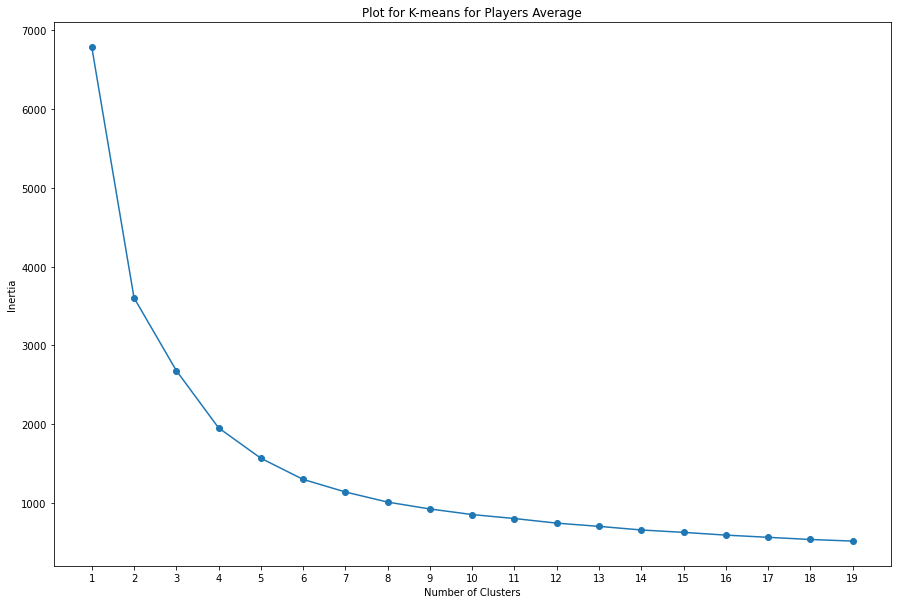

In [81]:
plt.figure(figsize=(15, 10))
plt.plot(k_range, inertia_list, marker="o")
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Plot for K-means for Players Average')
plt.xticks(k_range)
plt.show();

In [82]:
from sklearn.metrics import silhouette_score
k_range = np.arange(2, 20)

# Instantiate an empty list of silhouette scores
silhouette_scores = []

# Iterate over ks
for k in k_range:
    
    # Instantiate
    k_means_model = KMeans(n_clusters=k)

    # Fit
    k_means_model.fit(good_col)
    
    # Get cluster labels and calculate silhouette score
    cluster_labels = k_means_model.predict(good_col)
    silhouette = silhouette_score(good_col, cluster_labels)
    
    # Append to list
    silhouette_scores.append(silhouette)

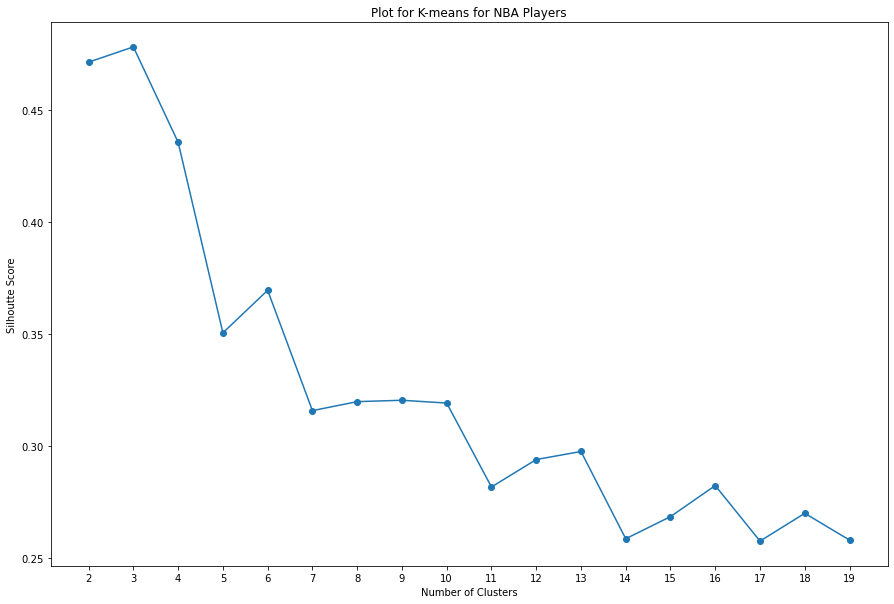

In [83]:
# plot the inertia 
plt.figure(figsize=(15, 10))
plt.plot(k_range, silhouette_scores, marker="o")
plt.xlabel('Number of Clusters')
plt.ylabel('Silhoutte Score')
plt.title('Plot for K-means for NBA Players')
plt.xticks(k_range)
plt.show();

In [84]:
from sklearn.cluster import KMeans

Kmeans_model = KMeans(n_clusters=6, random_state=1)
good_col = mean_df._get_numeric_data()
Kmeans_model.fit(good_col)
labels = Kmeans_model.labels_
labels

array([5, 0, 3, 4, 4, 4, 4, 4, 4, 4, 5, 5, 3, 5, 5, 4, 4, 0, 5, 3, 3, 3,
       3, 0, 4, 4, 4, 3, 3, 1, 0, 4, 3, 3, 4, 5, 4, 4, 5, 1, 5, 4, 3, 3,
       4, 4, 3, 4, 3, 5, 4, 0, 0, 4, 4, 1, 4, 2, 4, 4, 5, 2, 3, 5, 0, 5,
       4, 3, 0, 2, 5, 4, 2, 0, 4, 4, 4, 4, 5, 3, 3, 3, 4, 3, 5, 4, 4, 0,
       4, 3, 3, 3, 3, 3, 5, 0, 4, 2, 5, 4, 4, 4, 0, 3, 3, 4, 4, 5, 4, 0,
       3, 3, 5, 0, 4, 2, 3, 4, 5, 3, 1, 0, 3, 5, 2, 0, 3, 0, 4, 3, 2, 0,
       3, 4, 4, 4, 4, 3, 2, 3, 3, 3, 3, 4, 5, 5, 3, 3, 0, 3, 5, 5, 0, 0,
       2, 4, 4, 3, 0, 3, 4, 2, 5, 0, 1, 0, 2, 5, 3, 4, 3, 1, 3, 4, 2, 0,
       0, 4, 5, 2, 0, 3, 4, 5, 3, 0, 4, 0, 3, 2, 4, 0, 3, 3, 4, 4, 3, 2,
       4, 3, 5, 3, 4, 0, 0, 3, 1, 4, 2, 3, 5, 4, 5, 3, 3, 2, 3, 3, 4, 3,
       4, 5, 5, 2, 3, 4, 3, 5, 4, 4, 2, 0, 5, 4, 3, 0, 1, 2, 0, 5, 3, 3,
       3, 0, 0, 0, 4, 3, 0, 0, 2, 3, 3, 4, 3, 3, 4, 3, 0, 3, 4, 0, 4, 4,
       3, 1, 3, 3, 2, 5, 3, 4, 3, 3, 3, 4, 4, 3, 5, 3, 1, 4, 3, 4, 5, 3,
       4, 3, 0, 3, 4, 0, 0, 0, 3, 3, 4, 4, 4, 5, 5,

In [85]:
import plotly.express as px
from sklearn.decomposition import PCA
pca_2 = PCA(2)
plot_columns = pca_2.fit_transform(good_col)

fig = px.scatter(x=plot_columns[:,0], y=plot_columns[:,1], color=labels)
fig.show()

In [86]:
LeBron = good_col.loc[mean_df['PLAYER_NAME'] == 'LeBron James', :]
Durant = good_col.loc[mean_df['PLAYER_NAME'] == 'Kevin Durant', :]
print(LeBron)
print(Durant)

       FG_PCT   FG3_PCT    FT_PCT       REB       AST      STL       BLK  \
502  0.506284  0.327104  0.677801  8.084577  8.741294  1.18408  0.567164   

           TO  
502  3.716418  
       FG_PCT   FG3_PCT   FT_PCT       REB       AST       STL       BLK  \
465  0.545468  0.416122  0.86364  6.503597  5.539568  0.791367  1.172662   

           TO  
465  3.136691  


In [87]:
Lebron_list = LeBron.values.tolist()
durant_list = Durant.values.tolist()

Lebron_cluster = Kmeans_model.predict(Lebron_list)
durant_cluster = Kmeans_model.predict(durant_list)

print(Lebron_cluster)
print(durant_cluster)

[2]
[2]


In [88]:
Cluster = Kmeans_model.predict(good_col.loc[:,:])

In [89]:
cluster_df = pd.DataFrame({'Cluster Type': Cluster})

cluster_df

,Cluster Type
0,5
1,0
2,3
3,4
4,4
...,...
814,4
815,4
816,4
817,5


In [90]:
Player_Cluster = pd.merge(mean_df, cluster_df, left_index=True, right_index=True, how='left')
Player_Cluster

,PLAYER_NAME,FG_PCT,FG3_PCT,FT_PCT,REB,AST,STL,BLK,TO,Cluster Type
0,Aaron Gordon,0.440368,0.311598,0.578282,6.923445,3.468900,0.746411,0.641148,1.846890,5
1,Aaron Holiday,0.391000,0.335386,0.343317,1.673267,2.346535,0.673267,0.222772,1.094059,0
2,Aaron Nesmith,0.366077,0.287173,0.219558,2.826923,0.461538,0.346154,0.211538,0.596154,3
3,Abdel Nader,0.403346,0.282340,0.299333,1.954248,0.529412,0.359477,0.300654,0.633987,4
4,Abdul Gaddy,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4
...,...,...,...,...,...,...,...,...,...,...
814,Zeke Nnaji,0.363333,0.259708,0.121521,1.416667,0.229167,0.187500,0.125000,0.145833,4
815,Zhaire Smith,0.299368,0.259632,0.250000,1.210526,0.684211,0.421053,0.210526,0.631579,4
816,Zhou Qi,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4
817,Zion Williamson,0.617222,0.126263,0.664040,7.010101,2.969697,0.959596,0.525253,2.606061,5


In [91]:
g = Player_Cluster.groupby('Cluster Type')

g.mean()

,FG_PCT,FG3_PCT,FT_PCT,REB,AST,STL,BLK,TO
Cluster Type,,,,,,,,
0,0.393071,0.286489,0.402000,2.387794,2.850802,0.692143,0.214609,1.280194
1,0.547394,0.167323,0.616755,10.561728,2.787115,0.815932,1.174940,2.119417
2,0.440130,0.314238,0.632341,4.780594,5.695579,1.201497,0.384644,2.577695
3,0.389642,0.187551,0.302414,3.168337,0.971881,0.473842,0.346544,0.701810
4,0.288374,0.150554,0.173018,1.121038,0.590001,0.276025,0.118848,0.438484
5,0.467237,0.238264,0.466696,5.652846,1.710663,0.696282,0.706683,1.251206


In [92]:
g.std()


,FG_PCT,FG3_PCT,FT_PCT,REB,AST,STL,BLK,TO
Cluster Type,,,,,,,,
0,0.053867,0.086653,0.159645,0.780365,0.822571,0.252724,0.154488,0.434807
1,0.067665,0.149353,0.123047,1.500448,1.623527,0.333975,0.547289,0.712037
2,0.042658,0.072478,0.163546,1.561814,1.375449,0.332266,0.215550,0.716128
3,0.093212,0.123968,0.131311,0.676032,0.444981,0.265150,0.246694,0.276939
4,0.174054,0.138247,0.158001,0.604802,0.464973,0.268003,0.141736,0.317292
5,0.079133,0.131794,0.140594,0.951716,0.812984,0.291513,0.419667,0.449392


In [93]:
salaries_df = pd.read_csv('nba-salaries.csv')
salaries_df.head()

,rank,name,position,team,salary,season
0,1,Shaquille O'Neal,C,Los Angeles Lakers,17142000,2000
1,2,Kevin Garnett,PF,Minnesota Timberwolves,16806000,2000
2,3,Alonzo Mourning,C,Miami Heat,15004000,2000
3,4,Juwan Howard,PF,Washington Wizards,15000000,2000
4,5,Scottie Pippen,SF,Portland Trail Blazers,14795000,2000


In [94]:
salaries_df.describe()

,rank,salary,season
count,9456.000000,9.456000e+03,9456.000000
mean,250.483714,4.486115e+06,2011.438029
std,159.477367,5.366191e+06,5.623698
min,1.000000,2.692000e+03,2000.000000
25%,113.000000,9.152430e+05,2007.000000
50%,238.000000,2.351330e+06,2012.000000
75%,374.000000,5.822036e+06,2016.000000
max,699.000000,4.023176e+07,2020.000000


In [95]:
mask1 = (salaries_df['season'] >= 2018)

salaries_18_to_21 = salaries_df.loc[mask1]

salaries_18_to_21

,rank,name,position,team,salary,season
7827,1,Stephen Curry,PG,Golden State Warriors,37457154,2018
7828,2,Blake Griffin,PF,LA Clippers,32088932,2018
7829,3,Paul Millsap,PF,Denver Nuggets,31269231,2018
7830,4,Kyle Lowry,PG,Toronto Raptors,31200000,2018
7831,5,Gordon Hayward,SF,Boston Celtics,29727900,2018
...,...,...,...,...,...,...
9451,524,Jimmer Fredette,G,Phoenix Suns,208509,2020
9452,525,Jontay Porter,PF,Memphis Grizzlies,197933,2020
9453,526,Anthony Tolliver,PF,Memphis Grizzlies,183115,2020
9454,527,Tyler Johnson,SG,Phoenix Suns,183115,2020


In [96]:
Sgrouped_df = salaries_18_to_21.groupby("name")

Smean_df = Sgrouped_df.mean()

Smean_df = Smean_df.reset_index()

Smean_df.drop(['rank', 'season'], axis=1, inplace=True)

In [97]:
Smean_df

,name,salary
0,AJ Hammons,1.312611e+06
1,Aaron Brooks,1.471382e+06
2,Aaron Gordon,2.072727e+07
3,Aaron Harrison,9.144200e+04
4,Aaron Holiday,2.120580e+06
...,...,...
801,Zach Randolph,1.189744e+07
802,Zaza Pachulia,2.495100e+06
803,Zhaire Smith,2.792820e+06
804,Zhou Qi,1.190700e+06


In [100]:
Cluster_Salaries = pd.merge(Player_Cluster, Smean_df, left_on="PLAYER_NAME", right_on="name", how="left")

,PLAYER_NAME,FG_PCT,FG3_PCT,FT_PCT,REB,AST,STL,BLK,TO,Cluster Type,name,salary
0,Aaron Gordon,0.440368,0.311598,0.578282,6.923445,3.468900,0.746411,0.641148,1.846890,5,Aaron Gordon,2.072727e+07
1,Aaron Holiday,0.391000,0.335386,0.343317,1.673267,2.346535,0.673267,0.222772,1.094059,0,Aaron Holiday,2.120580e+06
2,Aaron Nesmith,0.366077,0.287173,0.219558,2.826923,0.461538,0.346154,0.211538,0.596154,3,NaN,NaN
3,Abdel Nader,0.403346,0.282340,0.299333,1.954248,0.529412,0.359477,0.300654,0.633987,4,Abdel Nader,1.388032e+06
4,Abdul Gaddy,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
814,Zeke Nnaji,0.363333,0.259708,0.121521,1.416667,0.229167,0.187500,0.125000,0.145833,4,NaN,NaN
815,Zhaire Smith,0.299368,0.259632,0.250000,1.210526,0.684211,0.421053,0.210526,0.631579,4,Zhaire Smith,2.792820e+06
816,Zhou Qi,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4,Zhou Qi,1.190700e+06
817,Zion Williamson,0.617222,0.126263,0.664040,7.010101,2.969697,0.959596,0.525253,2.606061,5,Zion Williamson,9.757440e+06


In [123]:
Cluster_Salaries

,PLAYER_NAME,FG_PCT,FG3_PCT,FT_PCT,REB,AST,STL,BLK,TO,Cluster Type,salary
0,Aaron Gordon,0.44,0.31,0.58,6.92,3.47,0.75,0.64,1.85,5,"20,727,272.50"
1,Aaron Holiday,0.39,0.34,0.34,1.67,2.35,0.67,0.22,1.09,0,"2,120,580.00"
3,Abdel Nader,0.40,0.28,0.30,1.95,0.53,0.36,0.30,0.63,4,"1,388,031.67"
7,Admiral Schofield,0.21,0.20,0.17,1.71,0.50,0.24,0.12,0.38,4,"1,000,000.00"
10,Al Horford,0.49,0.35,0.38,6.89,3.88,0.81,1.02,1.30,5,"28,221,038.33"
...,...,...,...,...,...,...,...,...,...,...,...
810,Zach LaVine,0.47,0.37,0.80,4.84,4.41,1.10,0.48,3.49,2,"19,500,000.00"
813,Zaza Pachulia,0.41,0.00,0.52,3.91,1.30,0.44,0.24,0.83,3,"2,495,100.50"
815,Zhaire Smith,0.30,0.26,0.25,1.21,0.68,0.42,0.21,0.63,4,"2,792,820.00"
816,Zhou Qi,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,4,"1,190,699.67"


In [103]:
Cluster_Salaries.drop(['name'], axis=1, inplace=True)

In [104]:
Cluster_Salaries.isna().sum()

PLAYER_NAME       0
FG_PCT            0
FG3_PCT           0
FT_PCT            0
REB               0
AST               0
STL               0
BLK               0
TO                0
Cluster Type      0
salary          249
dtype: int64

In [105]:
Cluster_Salaries.isna().sum()/Cluster_Salaries.shape[0] * 100

PLAYER_NAME      0.00000
FG_PCT           0.00000
FG3_PCT          0.00000
FT_PCT           0.00000
REB              0.00000
AST              0.00000
STL              0.00000
BLK              0.00000
TO               0.00000
Cluster Type     0.00000
salary          30.40293
dtype: float64

In [106]:
Cluster_Salaries = Cluster_Salaries.dropna(how='any',axis=0) 

In [107]:
Cluster_Salaries.isna().sum()/Cluster_Salaries.shape[0] * 100

PLAYER_NAME     0.0
FG_PCT          0.0
FG3_PCT         0.0
FT_PCT          0.0
REB             0.0
AST             0.0
STL             0.0
BLK             0.0
TO              0.0
Cluster Type    0.0
salary          0.0
dtype: float64

In [124]:
Cluster_0 = Cluster_Salaries.loc[Cluster_Salaries['Cluster Type'] == 0]
Cluster_0

,PLAYER_NAME,FG_PCT,FG3_PCT,FT_PCT,REB,AST,STL,BLK,TO,Cluster Type,salary
1,Aaron Holiday,0.39,0.34,0.34,1.67,2.35,0.67,0.22,1.09,0,"2,120,580.00"
17,Alex Caruso,0.41,0.32,0.37,2.40,2.53,1.08,0.32,1.25,0,"2,750,000.00"
23,Allonzo Trier,0.44,0.32,0.57,2.51,1.66,0.37,0.20,1.58,0,"3,466,500.00"
30,Andre Iguodala,0.44,0.27,0.17,3.59,2.64,0.89,0.71,0.94,0,"16,000,000.00"
51,Austin Rivers,0.38,0.29,0.31,2.30,1.91,0.69,0.19,0.85,0,"5,240,086.67"
...,...,...,...,...,...,...,...,...,...,...,...
752,Trey Burke,0.40,0.30,0.37,1.39,2.10,0.56,0.12,0.68,0,"1,653,510.00"
759,Ty Jerome,0.36,0.30,0.24,2.06,2.59,0.59,0.15,1.07,0,"2,193,480.00"
767,Tyler Johnson,0.38,0.31,0.35,2.31,2.02,0.59,0.25,0.89,0,"12,928,472.33"
771,Tyreke Evans,0.38,0.33,0.54,2.99,2.32,0.84,0.26,1.70,0,"9,363,333.33"


In [125]:
Cluster_0.sort_values('salary', ascending=True).head(10)

,PLAYER_NAME,FG_PCT,FG3_PCT,FT_PCT,REB,AST,STL,BLK,TO,Cluster Type,salary
113,Chris Chiozza,0.31,0.22,0.19,1.61,2.93,0.61,0.20,0.93,0,"90,005.00"
484,Ky Bowman,0.36,0.23,0.29,2.53,2.73,0.88,0.22,1.41,0,"350,189.00"
458,Kendrick Nunn,0.43,0.32,0.36,2.72,2.81,0.79,0.22,1.47,0,"710,794.50"
292,Isaiah Briscoe,0.34,0.17,0.14,1.90,2.23,0.28,0.05,0.79,0,"830,847.67"
559,Michael Carter-Williams,0.39,0.18,0.47,3.59,2.94,0.92,0.54,1.33,0,"840,192.00"
408,Jordan McRae,0.38,0.23,0.44,2.52,1.88,0.54,0.39,0.90,0,"845,695.00"
715,Talen Horton-Tucker,0.43,0.23,0.46,2.55,2.46,1.07,0.31,1.51,0,"898,310.00"
733,Tim Frazier,0.33,0.20,0.24,2.09,3.61,0.47,0.10,1.16,0,"908,558.50"
158,David Stockton,0.43,0.75,0.00,0.50,4.00,0.50,0.00,2.00,0,"933,659.67"
109,Chasson Randle,0.35,0.30,0.33,1.51,1.89,0.53,0.09,0.96,0,"1,090,852.50"


In [126]:
Cluster_0.sort_values('salary', ascending=False).head(10)

,PLAYER_NAME,FG_PCT,FG3_PCT,FT_PCT,REB,AST,STL,BLK,TO,Cluster Type,salary
87,CJ McCollum,0.45,0.38,0.63,4.13,3.84,0.83,0.50,1.68,0,"25,759,766.00"
478,Klay Thompson,0.46,0.40,0.55,3.89,2.32,1.13,0.63,1.55,0,"23,185,625.00"
366,Jeff Teague,0.40,0.33,0.59,2.13,4.88,0.81,0.31,1.74,0,"19,000,000.00"
734,Tim Hardaway Jr.,0.42,0.37,0.62,3.25,2.05,0.62,0.13,1.10,0,"18,850,084.67"
244,Evan Turner,0.36,0.07,0.32,4.00,3.25,0.41,0.27,1.39,0,"17,868,852.33"
243,Evan Fournier,0.43,0.36,0.59,2.91,3.31,1.01,0.25,1.85,0,"17,100,000.00"
30,Andre Iguodala,0.44,0.27,0.17,3.59,2.64,0.89,0.71,0.94,0,"16,000,000.00"
261,George Hill,0.46,0.32,0.50,2.66,2.66,0.82,0.12,0.90,0,"15,711,302.33"
337,James Johnson,0.41,0.27,0.33,3.45,2.22,0.75,0.72,1.26,0,"14,884,266.67"
73,Brandon Knight,0.33,0.31,0.25,1.55,2.14,0.47,0.09,1.05,0,"14,631,250.00"


In [127]:
Cluster_1 = Cluster_Salaries.loc[Cluster_Salaries['Cluster Type'] == 1]
Cluster_1

,PLAYER_NAME,FG_PCT,FG3_PCT,FT_PCT,REB,AST,STL,BLK,TO,Cluster Type,salary
29,Andre Drummond,0.52,0.03,0.52,14.30,1.97,1.68,1.55,2.75,1,"25,987,181.67"
39,Anthony Davis,0.51,0.26,0.77,9.75,3.40,1.41,2.07,2.18,1,"25,434,262.33"
55,Bam Adebayo,0.57,0.03,0.64,8.80,4.11,1.05,1.02,2.29,1,"3,121,920.00"
120,Clint Capela,0.62,0.00,0.47,13.13,1.17,0.67,1.72,1.36,1,"10,341,394.67"
164,DeAndre Jordan,0.69,0.00,0.48,10.23,1.96,0.44,1.07,1.72,1,"18,473,716.00"
171,Deandre Ayton,0.60,0.03,0.56,10.52,1.63,0.71,1.12,1.75,1,"8,864,040.00"
206,Domantas Sabonis,0.55,0.18,0.64,11.09,4.70,0.85,0.47,2.74,1,"2,949,718.33"
236,Enes Kanter,0.56,0.05,0.51,9.15,1.24,0.43,0.55,1.29,1,"7,958,874.33"
265,Giannis Antetokounmpo,0.56,0.26,0.67,12.28,5.67,1.19,1.26,3.50,1,"24,719,101.00"
280,Hassan Whiteside,0.58,0.03,0.44,10.67,0.86,0.45,2.10,1.47,1,"25,987,180.33"


In [128]:
Cluster_1.sort_values('salary', ascending=True).head(10)

,PLAYER_NAME,FG_PCT,FG3_PCT,FT_PCT,REB,AST,STL,BLK,TO,Cluster Type,salary
349,Jarrett Allen,0.61,0.04,0.60,9.33,1.52,0.54,1.39,1.34,1,"2,148,360.00"
386,John Collins,0.55,0.34,0.70,8.84,1.54,0.54,1.01,1.69,1,"2,428,240.00"
206,Domantas Sabonis,0.55,0.18,0.64,11.09,4.70,0.85,0.47,2.74,1,"2,949,718.33"
55,Bam Adebayo,0.57,0.03,0.64,8.80,4.11,1.05,1.02,2.29,1,"3,121,920.00"
236,Enes Kanter,0.56,0.05,0.51,9.15,1.24,0.43,0.55,1.29,1,"7,958,874.33"
171,Deandre Ayton,0.60,0.03,0.56,10.52,1.63,0.71,1.12,1.75,1,"8,864,040.00"
437,Jusuf Nurkic,0.50,0.11,0.62,9.96,3.36,1.04,1.28,2.24,1,"9,061,138.67"
427,Julius Randle,0.47,0.30,0.72,9.51,4.23,0.79,0.42,3.11,1,"10,263,414.00"
120,Clint Capela,0.62,0.00,0.47,13.13,1.17,0.67,1.72,1.36,1,"10,341,394.67"
483,Kristaps Porzingis,0.44,0.36,0.71,9.07,1.63,0.61,1.63,1.41,1,"12,893,036.00"


In [129]:
Cluster_1.sort_values('salary', ascending=False).head(10)

,PLAYER_NAME,FG_PCT,FG3_PCT,FT_PCT,REB,AST,STL,BLK,TO,Cluster Type,salary
385,Joel Embiid,0.49,0.33,0.81,11.84,3.12,0.85,1.55,3.31,1,"26,073,960.00"
29,Andre Drummond,0.52,0.03,0.52,14.30,1.97,1.68,1.55,2.75,1,"25,987,181.67"
280,Hassan Whiteside,0.58,0.03,0.44,10.67,0.86,0.45,2.10,1.47,1,"25,987,180.33"
469,Kevin Love,0.41,0.33,0.70,9.20,2.73,0.52,0.24,2.10,1,"25,726,960.00"
39,Anthony Davis,0.51,0.26,0.77,9.75,3.40,1.41,2.07,2.18,1,"25,434,262.33"
265,Giannis Antetokounmpo,0.56,0.26,0.67,12.28,5.67,1.19,1.26,3.50,1,"24,719,101.00"
706,Steven Adams,0.61,0.01,0.35,9.18,1.86,1.07,0.87,1.54,1,"24,157,303.33"
670,Rudy Gobert,0.68,0.00,0.61,12.99,1.56,0.69,2.26,1.69,1,"22,802,621.67"
164,DeAndre Jordan,0.69,0.00,0.48,10.23,1.96,0.44,1.07,1.72,1,"18,473,716.00"
603,Nikola Jokic,0.54,0.31,0.75,10.46,7.43,1.27,0.67,3.14,1,"17,860,397.67"


In [130]:
Cluster_2 = Cluster_Salaries.loc[Cluster_Salaries['Cluster Type'] == 2]
Cluster_2

,PLAYER_NAME,FG_PCT,FG3_PCT,FT_PCT,REB,AST,STL,BLK,TO,Cluster Type,salary
57,Ben Simmons,0.57,0.03,0.54,8.01,7.45,1.64,0.71,3.28,2,"6,994,323.33"
61,Blake Griffin,0.43,0.33,0.69,6.18,4.28,0.64,0.33,2.48,2,"32,875,942.67"
69,Bradley Beal,0.47,0.34,0.82,4.67,5.22,1.29,0.52,3.04,2,"25,987,181.67"
72,Brandon Ingram,0.48,0.35,0.78,5.39,4.01,0.73,0.58,2.65,2,"6,180,668.33"
97,Caris LeVert,0.42,0.31,0.56,4.19,4.62,1.21,0.41,2.14,2,"2,010,439.33"
115,Chris Paul,0.46,0.33,0.76,4.78,7.65,1.61,0.27,2.44,2,"32,920,042.33"
130,D'Angelo Russell,0.43,0.36,0.57,3.58,6.24,1.14,0.29,2.99,2,"13,774,798.67"
138,Damian Lillard,0.44,0.37,0.87,4.34,7.27,1.05,0.34,2.91,2,"27,977,689.00"
154,Darren Collison,0.45,0.37,0.54,3.05,5.94,1.40,0.11,1.69,2,"10,000,000.00"
161,De'Aaron Fox,0.46,0.30,0.68,3.61,7.08,1.53,0.51,2.94,2,"5,490,960.00"


In [131]:
Cluster_2.sort_values('salary', ascending=True).head(10)

,PLAYER_NAME,FG_PCT,FG3_PCT,FT_PCT,REB,AST,STL,BLK,TO,Cluster Type,salary
197,Devonte' Graham,0.36,0.33,0.52,2.75,5.28,0.85,0.13,1.79,2,"1,202,658.00"
223,Dwyane Wade,0.43,0.26,0.57,3.96,4.18,0.82,0.53,2.31,2,"1,512,601.00"
174,Dejounte Murray,0.44,0.28,0.49,6.47,4.82,1.55,0.17,2.02,2,"1,726,432.33"
97,Caris LeVert,0.42,0.31,0.56,4.19,4.62,1.21,0.41,2.14,2,"2,010,439.33"
208,Donovan Mitchell,0.44,0.37,0.76,4.28,4.43,1.12,0.30,2.80,2,"3,122,840.00"
689,Shai Gilgeous-Alexander,0.47,0.34,0.69,4.31,3.79,1.07,0.61,2.02,2,"3,664,140.00"
334,Jamal Murray,0.45,0.34,0.72,4.18,4.92,1.06,0.31,2.19,2,"3,766,622.00"
482,Kris Dunn,0.41,0.27,0.34,3.78,4.42,1.75,0.38,1.81,2,"4,596,669.00"
701,Spencer Dinwiddie,0.42,0.31,0.73,3.01,5.30,0.63,0.28,2.38,2,"4,639,261.33"
230,Elfrid Payton,0.41,0.23,0.36,4.24,5.53,1.06,0.28,2.11,2,"4,777,446.67"


In [132]:
Cluster_2.sort_values('salary', ascending=False).head(10)

,PLAYER_NAME,FG_PCT,FG3_PCT,FT_PCT,REB,AST,STL,BLK,TO,Cluster Type,salary
704,Stephen Curry,0.47,0.41,0.87,5.33,5.50,1.28,0.29,3.09,2,"38,382,022.00"
502,LeBron James,0.51,0.33,0.68,8.08,8.74,1.18,0.57,3.72,2,"36,545,504.00"
672,Russell Westbrook,0.44,0.25,0.68,9.95,9.66,1.60,0.38,4.55,2,"34,230,413.33"
465,Kevin Durant,0.55,0.42,0.86,6.50,5.54,0.79,1.17,3.14,2,"34,099,500.00"
115,Chris Paul,0.46,0.33,0.76,4.78,7.65,1.61,0.27,2.44,2,"32,920,042.33"
61,Blake Griffin,0.43,0.33,0.69,6.18,4.28,0.64,0.33,2.48,2,"32,875,942.67"
490,Kyle Lowry,0.42,0.36,0.73,4.97,7.62,1.31,0.41,2.79,2,"32,465,432.00"
336,James Harden,0.45,0.36,0.85,6.76,8.12,1.77,0.78,4.52,2,"32,306,751.00"
564,Mike Conley,0.43,0.36,0.71,3.34,5.66,1.16,0.22,1.88,2,"30,521,115.67"
138,Damian Lillard,0.44,0.37,0.87,4.34,7.27,1.05,0.34,2.91,2,"27,977,689.00"
